In [4]:
# Data Manipulation
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
#import shap

# Visualizaiton
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Get Dataset from Scikit-learn

# Data Preprocessing

# Regressor

# Metrics


In [5]:
boston_data = load_boston()


In [6]:
boston = pd.DataFrame(boston_data['data'],
                      columns=boston_data['feature_names'])
# Add target to the dataframe
boston['MEDV'] = boston_data.target


In [7]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
# Define feature and target
X = boston.drop('MEDV', axis=1)      # Feature
y = boston['MEDV']


In [9]:
# Splitting the datasets into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# Output the train and test data size
print(f"Train and Test Size {len(X_train)}, {len(X_test)}")


Train and Test Size 404, 102


In [10]:
X_train.shape


(404, 13)

In [11]:
X_train.head(2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88


In [12]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])


In [13]:
# fit/train model
pipe.fit(X_train, y_train)

# predict labels
y_pred = pipe.predict(X_test)

# metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse:0.4}')
print(f'RMSE: {rmse:0.4}')
print(f'R^2 Train: {pipe.score(X_train, y_train):0.4}')
print(f'R^2 Test: {pipe.score(X_test, y_test):0.4}')


MSE: 33.45
RMSE: 5.784
R^2 Train: 0.773
R^2 Test: 0.5892


In [14]:
y_pred.mean()


21.959397643961957

In [15]:
pipe['regressor'].coef_


array([-0.97082019,  1.05714873,  0.03831099,  0.59450642, -1.8551476 ,
        2.57321942, -0.08761547, -2.88094259,  2.11224542, -1.87533131,
       -2.29276735,  0.71817947, -3.59245482])

In [16]:
pipe['regressor'].intercept_


22.611881188118804

In [17]:
laso = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso(alpha=0.1))
])


In [18]:
laso.fit(X_train, y_train)
print(f'R^2 Train: {laso.score(X_train, y_train):0.4}')
print(f'R^2 Test: {laso.score(X_test, y_test):0.4}')


R^2 Train: 0.7677
R^2 Test: 0.5664


In [19]:
laso['regressor'].coef_


array([-0.66346811,  0.70152397, -0.13072368,  0.5889339 , -1.35874893,
        2.72275426, -0.        , -2.14093195,  0.64085327, -0.65877899,
       -2.17221721,  0.60266575, -3.61579998])

In [20]:
alpha_range = np.linspace(0.01, 1, 50)
# alpha_range = 10**np.linspace(2,-2,100)*0.5
la_coef = []

for i in alpha_range:
    laso = Pipeline([('scaler', StandardScaler()),
                    ('regressor', Lasso(alpha=i))])
    laso.fit(X, y)
    la_coef.append(laso['regressor'].coef_)


In [21]:
def plot_coeff(alpha_range, coef, modelname):

    # Plot Coefficients
    fig = plt.figure(figsize=(20, 8))
    ax = plt.axes()

    ax.plot(alpha_range, coef)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    ax.set_title(
        f'{modelname} coefficients as a function of the regularization')
    ax.set_xlabel('$\lambda$')
    ax.set_ylabel('$\mathbf{w}$')


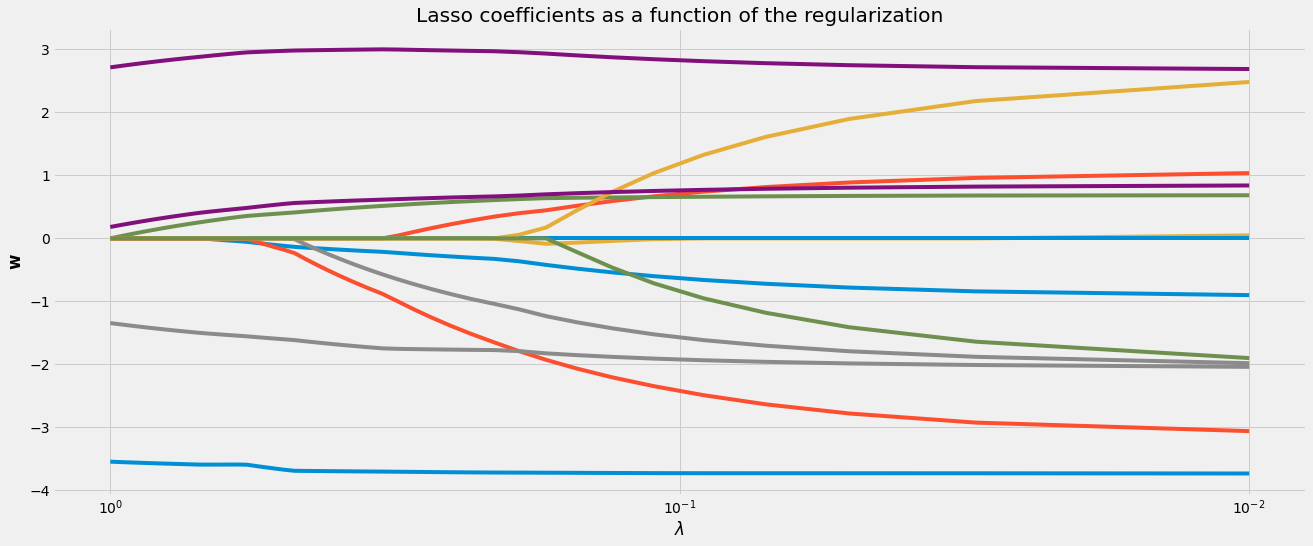

In [22]:
# Plot Coefficients
plot_coeff(alpha_range, la_coef, 'Lasso')


In [23]:
rid = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=1))
])


In [24]:
# fit ridge model
rid.fit(X, y)
print(f'R^2 Train: {rid.score(X_train, y_train):0.4}')
print(f'R^2 Test: {rid.score(X_test, y_test):0.4}')


R^2 Train: 0.77
R^2 Test: 0.6184


In [25]:
rid['regressor'].coef_


array([-0.91987132,  1.06646104,  0.11738487,  0.68512693, -2.02901013,
        2.68275376,  0.01315848, -3.07733968,  2.59153764, -2.0105579 ,
       -2.05238455,  0.84884839, -3.73066646])

In [26]:
# alpha_range = np.arange(1,2000,100)
alpha_range = 10**np.linspace(6, -2, 100)*0.5
rid_coef = []

for i in alpha_range:
    rid = Pipeline([('scaler', StandardScaler()),
                   ('regressor', Ridge(alpha=i))])
    rid.fit(X, y)
    rid_coef.append(rid['regressor'].coef_)


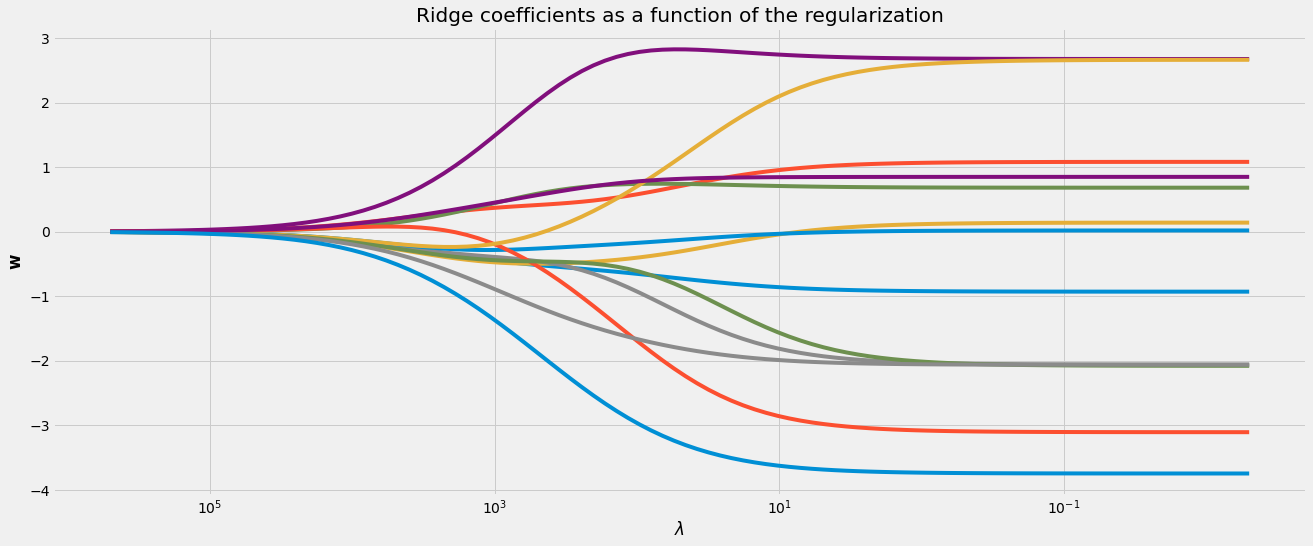

In [27]:
# Plot Coefficients
plot_coeff(alpha_range, rid_coef, 'Ridge')


In [28]:
elastic = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ElasticNet(alpha=0.1, l1_ratio=0.5))
])


In [29]:
# fit elasticnet model
elastic.fit(X_train, y_train)
print(f'R^2 Train: {elastic.score(X_train, y_train):0.4}')
print(f'R^2 Test: {elastic.score(X_test, y_test):0.4}')


R^2 Train: 0.7671
R^2 Test: 0.5617


In [30]:
elastic['regressor'].coef_


array([-0.74093903,  0.72243247, -0.26704266,  0.62522263, -1.18854988,
        2.73484113, -0.09746715, -2.04841124,  0.7449307 , -0.78039169,
       -2.10099018,  0.66923402, -3.34109508])

In [31]:
# alpha_range = np.linspace(0.01,15,150)
alpha_range = 10**np.linspace(2, -2, 100)*0.5
elastic_coef = []

for i in alpha_range:
    elastic = Pipeline([('scaler', StandardScaler()),
                       ('regressor', ElasticNet(alpha=i))])
    elastic.fit(X, y)
    elastic_coef.append(elastic['regressor'].coef_)


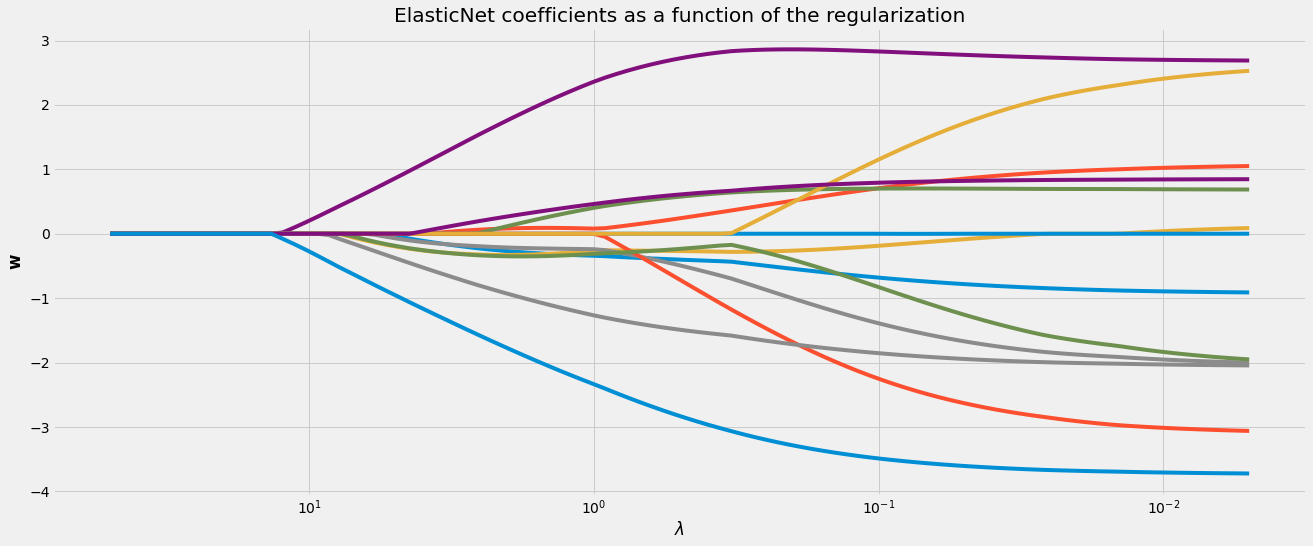

In [32]:
# Plot Coefficients
plot_coeff(alpha_range, elastic_coef, 'ElasticNet')


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [34]:
def vif(X):

    # perform feature scaling
    scaler = StandardScaler()
    xs = scaler.fit_transform(X)

    # subsume into a dataframe
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF Factor"] = [variance_inflation_factor(
        xs, i) for i in range(xs.shape[1])]

    return vif


In [35]:
vif(X).round(2)


,Features,VIF Factor
0,CRIM,1.79
1,ZN,2.30
2,INDUS,3.99
3,CHAS,1.07
4,NOX,4.39
5,RM,1.93
6,AGE,3.10
7,DIS,3.96
8,RAD,7.48
9,TAX,9.01


In [36]:
newX = X.drop(['TAX', 'RAD'], axis=1)


In [37]:
vif(newX).sort_values(by="VIF Factor")


,Features,VIF Factor
3,CHAS,1.057805
9,B,1.316559
0,CRIM,1.478206
8,PTRATIO,1.496077
5,RM,1.872532
1,ZN,2.154483
10,LSTAT,2.936487
6,AGE,3.075755
2,INDUS,3.179166
4,NOX,3.901348


In [38]:
# Filter first six features
X_method1 = X[['CHAS', 'B', 'CRIM', 'PTRATIO', 'RM', 'ZN']]


In [39]:
# fit/train model
pipe.fit(X_method1, y)

# predict labels
y_pred = pipe.predict(X_method1)

print(y_pred[:10])
print(f'R^2: {pipe.score(X_method1, y):0.4}')


[28.57799551 24.78825544 30.16715122 28.03678666 29.13085894 23.98038835
 24.50415657 25.65810523 21.62521274 24.29070206]
R^2: 0.6273


In [40]:
# Feature Selection
from sklearn.feature_selection import f_regression, SelectKBest, SelectPercentile


In [41]:
from sklearn.feature_selection import f_regression, SelectKBest, SelectPercentile


In [42]:
# SelectKBest
# selector1 = SelectPercentile(f_regression, percentile=25)
method2 = SelectKBest(f_regression, k=6)

# Fit the model
method2.fit(X, y)


SelectKBest(k=6, score_func=<function f_regression at 0x00000296C11440D0>)

In [43]:
# Show selected features
method2.get_support(indices=True)


array([ 2,  4,  5,  9, 10, 12], dtype=int64)

In [44]:
# Iterate the score
for f, s in zip(X.columns, method2.scores_):
    print(f'F-score: {s:0.4} for feature {f}')


F-score: 89.49 for feature CRIM
F-score: 75.26 for feature ZN
F-score: 154.0 for feature INDUS
F-score: 15.97 for feature CHAS
F-score: 112.6 for feature NOX
F-score: 471.8 for feature RM
F-score: 83.48 for feature AGE
F-score: 33.58 for feature DIS
F-score: 85.91 for feature RAD
F-score: 141.8 for feature TAX
F-score: 175.1 for feature PTRATIO
F-score: 63.05 for feature B
F-score: 601.6 for feature LSTAT


In [45]:
# Filter six features with highest score
X_method2 = X[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]


In [46]:
# fit/train model
pipe.fit(X_method2, y)

# predict labels
y_pred = pipe.predict(X_method2)

print(y_pred[:10])
print(f'R^2: {pipe.score(X_method2, y):0.4}')


[30.57014999 26.10398705 32.45084162 31.0219246  30.41087418 27.1380861
 24.46192059 21.5381886  13.13415681 21.87515864]
R^2: 0.681


In [47]:
# check the coefficients
pipe['regressor'].coef_


array([ 0.59754458, -0.39395547,  3.26810054, -0.48846049, -1.9764135 ,
       -3.89469824])

In [48]:
# Feature Selection using RFE
from sklearn.feature_selection import RFECV, RFE


In [49]:
# Method 3
method3 = RFE(LinearRegression(), n_features_to_select=6, step=1)
method3.fit(X, y)


RFE(estimator=LinearRegression(), n_features_to_select=6)

In [50]:
# Check the selected position
method3.support_


array([False, False, False,  True,  True,  True, False,  True, False,
       False,  True, False,  True])

In [51]:
# Get the feature ranking
method3.ranking_


array([3, 5, 4, 1, 1, 1, 8, 1, 2, 6, 1, 7, 1])

In [52]:
# Select Six Features
min_value = min(method3.ranking_)
col = [i for i, x in enumerate(method3.ranking_) if x == min_value]
col


[3, 4, 5, 7, 10, 12]

In [53]:
# Filter selected features
X_method3 = X[['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]


In [54]:
# fit/train model
pipe.fit(X_method3, y)

# predict labels
y_pred = pipe.predict(X_method3)

print(y_pred[:10])
print(f'R^2: {pipe.score(X_method3, y):0.4}')


[31.0142456  25.79278275 31.84611084 29.74856961 28.99930186 26.11951419
 23.13348366 19.51563196 10.99759368 19.25866209]
R^2: 0.7158


In [55]:
# check the coefficients
pipe['regressor'].coef_


array([ 0.82321941, -2.16945087,  2.88617319, -2.40778286, -2.16874483,
       -4.06526959])

In [56]:
# Method 4
method4 = RFECV(LinearRegression(), cv=10)
method4.fit(X, y)


RFECV(cv=10, estimator=LinearRegression())

In [57]:
# Get the selected features with CV
method4.n_features_


6

In [58]:
# Get the index of the selected features
method4.get_support(indices=True)


array([ 3,  4,  5,  7, 10, 12], dtype=int64)

In [59]:
# Check the selected position
method4.support_


array([False, False, False,  True,  True,  True, False,  True, False,
       False,  True, False,  True])

In [60]:
# Get the feature ranking
method4.ranking_


array([3, 5, 4, 1, 1, 1, 8, 1, 2, 6, 1, 7, 1])

In [61]:
# Select Six Features
min_value = min(method4.ranking_)
col = [i for i, x in enumerate(method4.ranking_) if x == min_value]
col


[3, 4, 5, 7, 10, 12]

In [62]:
# Iterate to get features
for i in range(len(col)):
    print(X.columns[col[i]])


CHAS
NOX
RM
DIS
PTRATIO
LSTAT


In [63]:
# Filter selected features
X_method4 = X[['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]


In [64]:
# fit/train model
pipe.fit(X_method4, y)

# predict labels
y_pred = pipe.predict(X_method4)

print(y_pred[:10])
print(f'R^2: {pipe.score(X_method4, y):0.4}')# fit/train model
pipe.fit(X_method4, y)

# predict labels
y_pred = pipe.predict(X_method4)

print(y_pred[:10])
print(f'R^2: {pipe.score(X_method4, y):0.4}')

[31.0142456  25.79278275 31.84611084 29.74856961 28.99930186 26.11951419
 23.13348366 19.51563196 10.99759368 19.25866209]
R^2: 0.7158
[31.0142456  25.79278275 31.84611084 29.74856961 28.99930186 26.11951419
 23.13348366 19.51563196 10.99759368 19.25866209]
R^2: 0.7158


In [65]:
# check the coefficients
pipe['regressor'].coef_


array([ 0.82321941, -2.16945087,  2.88617319, -2.40778286, -2.16874483,
       -4.06526959])